#### Applying SVD and checking the Singular value decay 

In [7]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.linalg import svd
from IPython.display import Audio
import soundfile as sf

In [3]:
# Load an example audio file
audio_file = librosa.example('trumpet')
y, sr = librosa.load(audio_file)

In [4]:
Audio(audio_file)

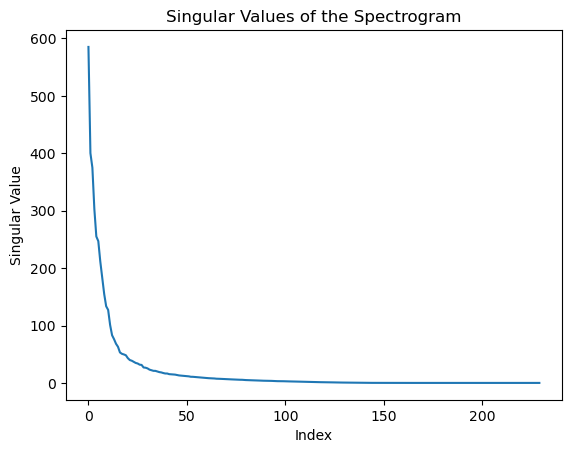

In [6]:
# Convert the audio signal into a spectrogram (Short-Time Fourier Transform)
S = np.abs(librosa.stft(y))

# Perform SVD on the spectrogram
U, Sigma, Vt = np.linalg.svd(S, full_matrices=False)

# Plot the singular values
plt.plot(Sigma)
plt.title('Singular Values of the Spectrogram')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.show()



In [26]:
# Load a noisy audio file
audio_file = librosa.example('trumpet')
y, sr = librosa.load(audio_file)

# Create a noisy version of the audio by adding random noise
noisy_y = y + 0.05 * np.random.randn(len(y))

# Write the processed audio back to a WAV file
output_filename = 'noisy_trumpet.wav'
sf.write(output_filename, y, sr) # Using soundfile.write for modern librosa versions

In [21]:
Audio('noisy_trumpet.wav')

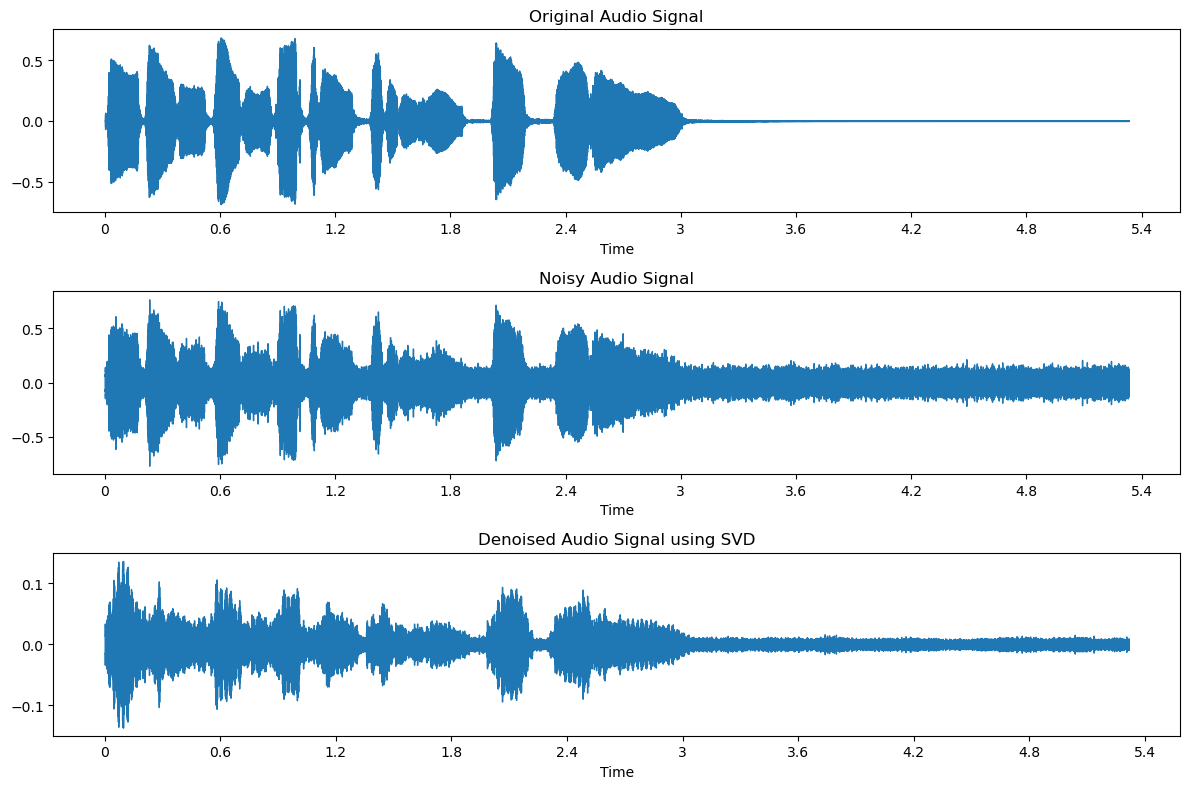

In [31]:
# Remove Noise

# Compute the spectrogram of the noisy signal
S = np.abs(librosa.stft(noisy_y))

# Perform SVD
U, Sigma, Vt = np.linalg.svd(S, full_matrices=False)

# Set a threshold to zero out smaller singular values
k = 50  # Keep only the top 50 singular values
Sigma[k:] = 0

# Reconstruct the spectrogram with reduced noise
S_reconstructed = np.dot(U, np.dot(np.diag(Sigma), Vt))

# Convert the spectrogram back to an audio signal
y_reconstructed = librosa.istft(S_reconstructed)

# Plot and compare the original, noisy, and denoised signals
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio Signal')

plt.subplot(3, 1, 2)
librosa.display.waveshow(noisy_y, sr=sr)
plt.title('Noisy Audio Signal')

plt.subplot(3, 1, 3)
librosa.display.waveshow(y_reconstructed, sr=sr)
plt.title('Denoised Audio Signal using SVD')

plt.tight_layout()
plt.show()